In [3]:
%run ./2020-02-13_utils.ipynb

scanpy==1.4.5.post1 anndata==0.7.1 umap==0.3.9 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1


In [4]:
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN
counts=20000

FIGS=DATA+'/Figures/'

The dataset we will use for the paper
==

will be the downsampled to 20k counts/cell, so we can account nicely for sequencing depth across channels.

In [3]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.h5ad')
adata

Only considering the two last: ['.counts_per_cell20000', '.h5ad'].
Only considering the two last: ['.counts_per_cell20000', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 24482 
    obs: 'KRAS_A146P', 'KRAS_A146T', 'KRAS_A146V', 'KRAS_A59E', 'KRAS_A59G', 'KRAS_A59T', 'KRAS_AG11TD', 'KRAS_AG59GV', 'KRAS_C118S', 'KRAS_D119G', 'KRAS_D33E', 'KRAS_D57N', 'KRAS_E31K', 'KRAS_E63K-', 'KRAS_G12A', 'KRAS_G12C', 'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12I', 'KRAS_G12R', 'KRAS_G12S', 'KRAS_G12V', 'KRAS_G12Y', 'KRAS_G13C', 'KRAS_G13E', 'KRAS_G13R', 'KRAS_G13V', 'KRAS_G60D', 'KRAS_G60S', 'KRAS_G60V', 'KRAS_H166Y', 'KRAS_I163S', 'KRAS_I36M', 'KRAS_K117N', 'KRAS_K117R', 'KRAS_K147N', 'KRAS_K147T', 'KRAS_K176Q', 'KRAS_K5E', 'KRAS_L159S', 'KRAS_L19F', 'KRAS_L52F', 'KRAS_L79I', 'KRAS_M111L', 'KRAS_N26Y', 'KRAS_P110S', 'KRAS_P34L', 'KRAS_P34R', 'KRAS_Q22H', 'KRAS_Q22K', 'KRAS_Q25H', 'KRAS_Q61A', 'KRAS_Q61H', 'KRAS_Q61K', 'KRAS_Q61L', 'KRAS_Q61P', 'KRAS_Q61R', 'KRAS_Q99E', 'KRAS_R135T', 'KRAS_R149K', 'KRAS_R164Q', 'KRAS_R41K', 'KRAS_R68S', 'KRAS_T144P', 'KRAS_T158A', 'KRAS_T20M', 'KRAS_T20R', 'KRAS_T50I', 'KRAS_T50P', 'KRAS_T58I', 'KRA

In [4]:
import copy
adata.obs['n_counts_downsampled'] = adata.X.sum(axis=1).A1
adata.obs['n_counts_original'] = copy.deepcopy(adata.obs['n_counts'])

In [5]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.h5ad')

In [42]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.h5ad')
adata

Only considering the two last: ['.counts_per_cell20000', '.h5ad'].
Only considering the two last: ['.counts_per_cell20000', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 24482 
    obs: 'KRAS_A146P', 'KRAS_A146T', 'KRAS_A146V', 'KRAS_A59E', 'KRAS_A59G', 'KRAS_A59T', 'KRAS_AG11TD', 'KRAS_AG59GV', 'KRAS_C118S', 'KRAS_D119G', 'KRAS_D33E', 'KRAS_D57N', 'KRAS_E31K', 'KRAS_E63K-', 'KRAS_G12A', 'KRAS_G12C', 'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12I', 'KRAS_G12R', 'KRAS_G12S', 'KRAS_G12V', 'KRAS_G12Y', 'KRAS_G13C', 'KRAS_G13E', 'KRAS_G13R', 'KRAS_G13V', 'KRAS_G60D', 'KRAS_G60S', 'KRAS_G60V', 'KRAS_H166Y', 'KRAS_I163S', 'KRAS_I36M', 'KRAS_K117N', 'KRAS_K117R', 'KRAS_K147N', 'KRAS_K147T', 'KRAS_K176Q', 'KRAS_K5E', 'KRAS_L159S', 'KRAS_L19F', 'KRAS_L52F', 'KRAS_L79I', 'KRAS_M111L', 'KRAS_N26Y', 'KRAS_P110S', 'KRAS_P34L', 'KRAS_P34R', 'KRAS_Q22H', 'KRAS_Q22K', 'KRAS_Q25H', 'KRAS_Q61A', 'KRAS_Q61H', 'KRAS_Q61K', 'KRAS_Q61L', 'KRAS_Q61P', 'KRAS_Q61R', 'KRAS_Q99E', 'KRAS_R135T', 'KRAS_R149K', 'KRAS_R164Q', 'KRAS_R41K', 'KRAS_R68S', 'KRAS_T144P', 'KRAS_T158A', 'KRAS_T20M', 'KRAS_T20R', 'KRAS_T50I', 'KRAS_T50P', 'KRAS_T58I', 'KRA

In [43]:
#plot the distribution of counts per channel
counts_df=pd.DataFrame({'counts':adata.obs['n_counts'],
                    'counts_downsampled':adata.obs['n_counts_downsampled'],
                    'channel':adata.obs['batch']})

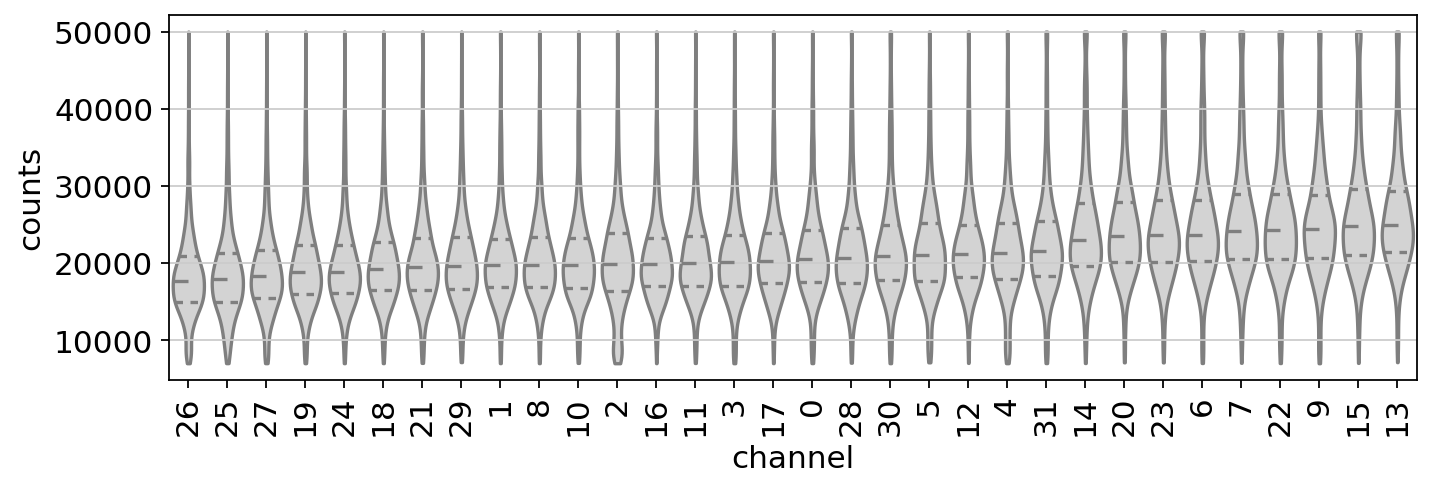

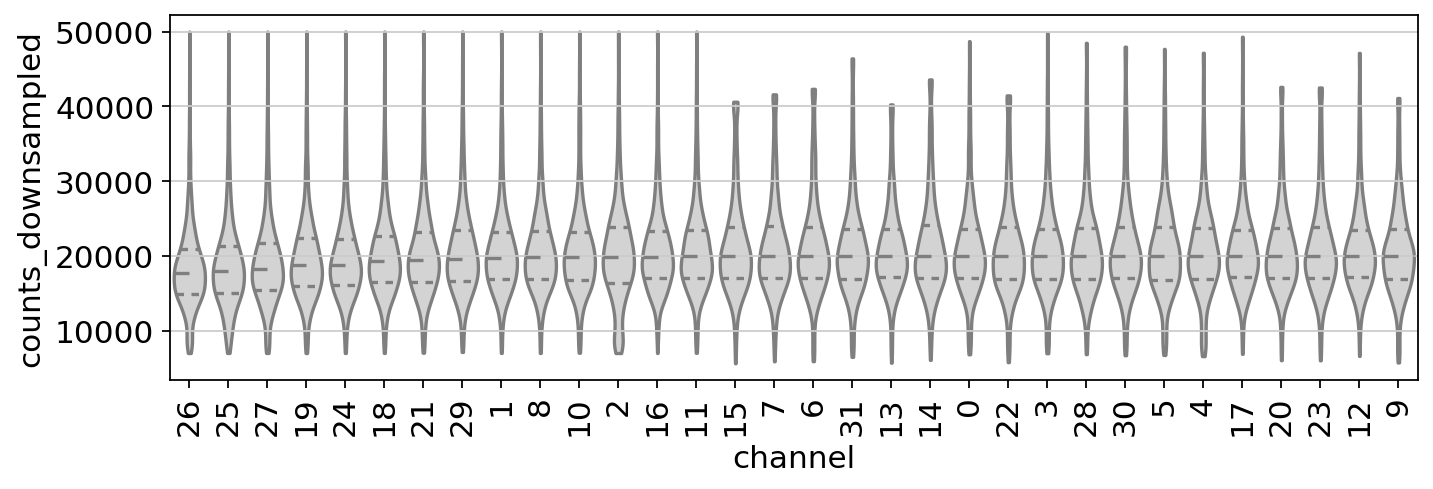

In [44]:
hue_dict={}
for ch in list(set(counts_df['channel'])):
    hue_dict[ch]='lightgray'
    
sorted_catplot(counts_df,'channel','counts','channel',
              hue_dict,figwidth=10,figheight=3)
sorted_catplot(counts_df,'channel','counts_downsampled','channel',
              hue_dict,figwidth=10,figheight=3)

Expression of variant barcodes
---

In [45]:
#subset to singly infected cells
keep=[]
for i in range(adata.shape[0]):
    m=adata.obs['mutant'][i]
    if m not in ['uninfected','multiple']:
        keep.append(i)
adata_single=adata[keep,:]
adata_single

View of AnnData object with n_obs × n_vars = 102767 × 24482 
    obs: 'KRAS_A146P', 'KRAS_A146T', 'KRAS_A146V', 'KRAS_A59E', 'KRAS_A59G', 'KRAS_A59T', 'KRAS_AG11TD', 'KRAS_AG59GV', 'KRAS_C118S', 'KRAS_D119G', 'KRAS_D33E', 'KRAS_D57N', 'KRAS_E31K', 'KRAS_E63K-', 'KRAS_G12A', 'KRAS_G12C', 'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12I', 'KRAS_G12R', 'KRAS_G12S', 'KRAS_G12V', 'KRAS_G12Y', 'KRAS_G13C', 'KRAS_G13E', 'KRAS_G13R', 'KRAS_G13V', 'KRAS_G60D', 'KRAS_G60S', 'KRAS_G60V', 'KRAS_H166Y', 'KRAS_I163S', 'KRAS_I36M', 'KRAS_K117N', 'KRAS_K117R', 'KRAS_K147N', 'KRAS_K147T', 'KRAS_K176Q', 'KRAS_K5E', 'KRAS_L159S', 'KRAS_L19F', 'KRAS_L52F', 'KRAS_L79I', 'KRAS_M111L', 'KRAS_N26Y', 'KRAS_P110S', 'KRAS_P34L', 'KRAS_P34R', 'KRAS_Q22H', 'KRAS_Q22K', 'KRAS_Q25H', 'KRAS_Q61A', 'KRAS_Q61H', 'KRAS_Q61K', 'KRAS_Q61L', 'KRAS_Q61P', 'KRAS_Q61R', 'KRAS_Q99E', 'KRAS_R135T', 'KRAS_R149K', 'KRAS_R164Q', 'KRAS_R41K', 'KRAS_R68S', 'KRAS_T144P', 'KRAS_T158A', 'KRAS_T20M', 'KRAS_T20R', 'KRAS_T50I', 'KRAS_T50P', 'KRAS_T58

In [46]:
#make a variable with the counts per variant
counts_per_v=[]
for i in range(adata_single.shape[0]):
    m=adata_single.obs['mutant'][i]
    count_current=adata_single.obs[m][i]
    counts_per_v.append(count_current)
adata_single.obs['counts_per_variant']=counts_per_v

Trying to set attribute `.obs` of view, copying.


In [47]:
#divide by n_counts (not downsampled)
vbc_counts=pd.DataFrame({'mut.std':adata_single.obs['mut.std'],
                        'vbc_count':adata_single.obs['counts_per_variant'],
                        'counts_original':adata_single.obs['n_counts_original']})
vbc_counts['vbc_norm_counts']=vbc_counts['vbc_count']/vbc_counts['counts_original']

In [57]:
#do DE test to find sig different ones
from scipy import stats

fdr=0.1

de_vbc=pd.DataFrame({'variant':list(set(vbc_counts['mut.std'])),
                    'p':-1,
                    'sign':1,
                    'mean_expr':-1})
for v in de_vbc['variant']:
    v_values=vbc_counts.loc[vbc_counts['mut.std']==v,'vbc_norm_counts']
    wt_values=vbc_counts.loc[vbc_counts['mut.std']=='WT','vbc_norm_counts']
    ttest_out=stats.ttest_ind(v_values,wt_values, equal_var = False)
    p=ttest_out[1]
    de_vbc.loc[de_vbc['variant']==v,'p']=p
    de_vbc.loc[de_vbc['variant']==v,'sign']=np.sign(ttest_out[0])
    de_vbc.loc[de_vbc['variant']==v,'mean_expr']=np.mean(v_values)
    
de_vbc=de_vbc.sort_values(by='p')
from statsmodels.stats.multitest import multipletests
de_vbc['p.bh']=multipletests(de_vbc['p'], alpha=0.05, method='fdr_bh')[1]
de_vbc['signed_minuslogp.bh']=-de_vbc['sign']*np.log10(de_vbc['p.bh'])
print(de_vbc.loc[de_vbc['p.bh']<fdr,:])
de_vbc=de_vbc.sort_values(by='signed_minuslogp.bh',ascending=True)

   variant             p  sign  mean_expr          p.bh  signed_minuslogp.bh
97    Q61K  5.259161e-50  -1.0   0.000068  5.153978e-48           -47.287857
64    Q61L  1.466745e-26  -1.0   0.000087  7.187052e-25           -24.143449
5     T74A  3.810008e-22  -1.0   0.000092  1.244603e-20           -19.904969
84   K178K  6.780152e-20   1.0   0.000181  1.661137e-18            17.779594
90    G12A  8.065837e-19   1.0   0.000188  1.580904e-17            16.801094
34   L159S  3.479372e-15   1.0   0.000174  5.682974e-14            13.245424
28    Q61R  1.538130e-14  -1.0   0.000099  2.153383e-13           -12.666879
37    Q61A  1.839250e-13  -1.0   0.000100  2.253081e-12           -11.647223
75     V8V  5.567630e-12   1.0   0.000170  6.062530e-11            10.217346
41    T58I  3.979572e-11  -1.0   0.000105  3.899981e-10            -9.408938
6     G12C  1.601227e-10   1.0   0.000173  1.426547e-09             8.845714
25    Q99E  3.180288e-10   1.0   0.000167  2.597235e-09             8.585489

In [58]:
color_dict={}
for i in range(de_vbc.shape[0]):
    mut=de_vbc.iloc[i,0]
    pbh=de_vbc.iloc[i,1]
    direction=de_vbc.iloc[i,2]
    val=-np.log10(pbh)
    x=30
    if direction>0:
        col=(max(0,1-0.75*val/x),max(0,1-val/x),max(0,1-val/x))
        col='pink'
    else:
        col=(max(0,1-val/x),max(0,1-val/x),max(0,1-0.55*val/x))
        col='lightblue'
    if pbh>fdr:
        col='white'
    #if mut=='WT':
    #    col='yellow'
    color_dict[mut]=col

vbc_counts['Normalized variant\n barcode counts']=vbc_counts['vbc_norm_counts']

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


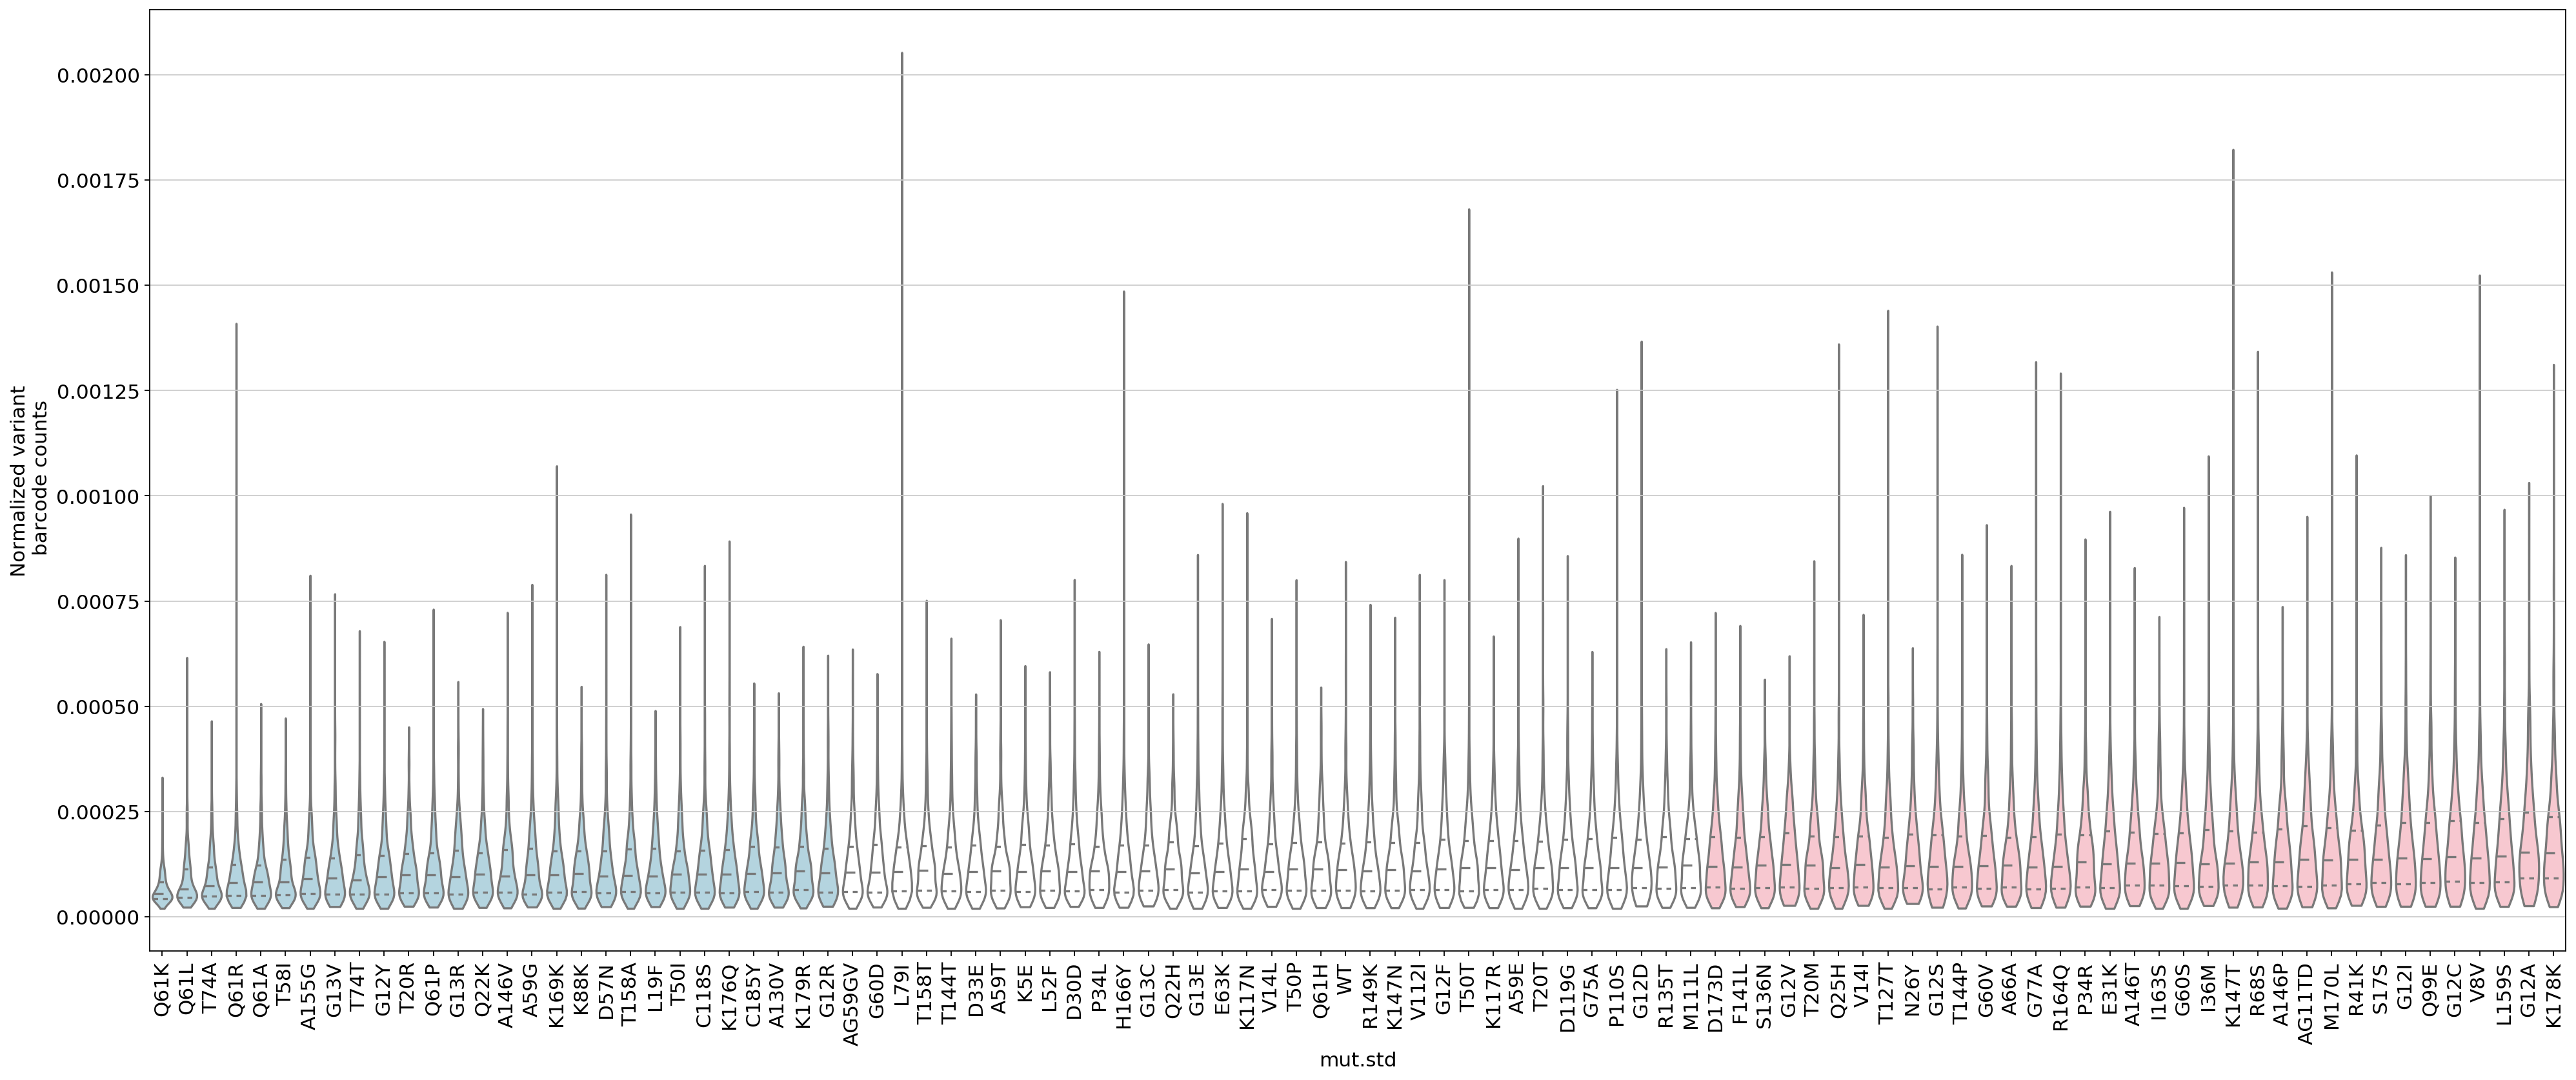

In [59]:
import copy
vbc_counts_clip=copy.deepcopy(vbc_counts)
vbc_counts_clip['Normalized variant\n barcode counts'][vbc_counts_clip['Normalized variant\n barcode counts']>0.003]=0.003
sorted_catplot_given_order(vbc_counts_clip,'mut.std','Normalized variant\n barcode counts',
                           list(de_vbc['variant']),
                           'mut.std',
              color_dict,figwidth=30,figheight=12)

In [60]:
remember_de_vbc=de_vbc

(90, 3)           Z-Low-D7  Z-Low-D14  mean_var_expr
Mutation                                    
V14L          1.20       1.15       0.000134
T20M          0.73       0.54       0.000144
K88K          0.22       0.59       0.000122
R68S          0.11      -0.09       0.000156
G12R          4.89       3.66       0.000125


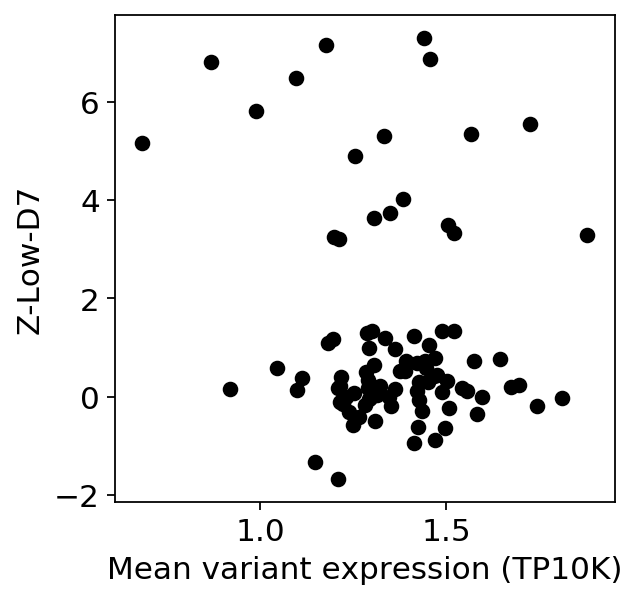

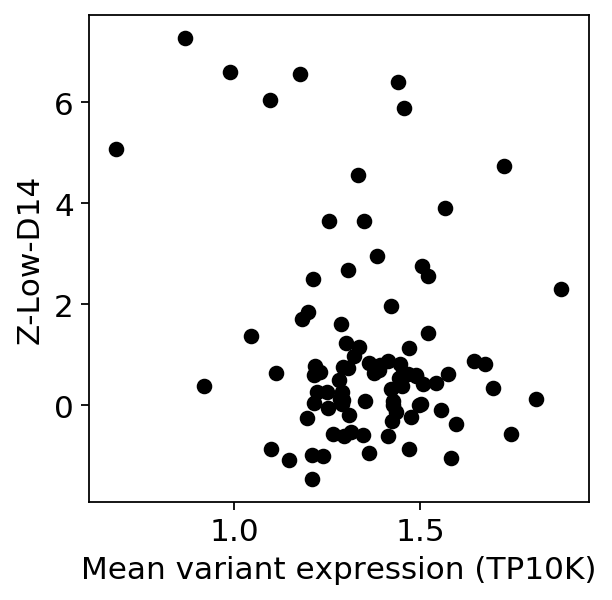

In [67]:
#compare with functional assay
f='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2019-06-07/KRAS/mutational_signatures/KRAS_mutationalSignatures_Andrew.txt'
mutsig=pd.read_csv(f,sep='\t')
#permute the order of the rows, in case they were ordered
mutsig=mutsig.sample(frac=1)
#keep only ones that have a mutational signature score
mutsig=mutsig.dropna(axis='index')
mutsig.index=mutsig['Mutation']

de_vbc.index=de_vbc['variant']
variants=list(set(de_vbc['variant']).intersection(set(mutsig.index)))
func_data=mutsig.loc[variants,['Z-Low-D7','Z-Low-D14']]
func_data['mean_var_expr']=de_vbc.loc[variants,'mean_expr']

print(func_data.shape,func_data.head())

plt.scatter(10000*func_data['mean_var_expr'],func_data['Z-Low-D7'],color='black')
plt.xlabel('Mean variant expression (TP10K)')
plt.ylabel('Z-Low-D7')
plt.grid(False)
plt.show()

plt.scatter(10000*func_data['mean_var_expr'],func_data['Z-Low-D14'],color='black')
plt.xlabel('Mean variant expression (TP10K)')
plt.ylabel('Z-Low-D14')
plt.grid(False)
plt.show()

In [16]:
#look at the endogenous locus as well
#divide by n_counts (not downsampled)
vbc_counts=pd.DataFrame({'mut.std':adata_single.obs['mut.std'],
                        'count':adata_single[:,PROTEIN].X.toarray().flatten(),
                        'counts_original':adata_single.obs['n_counts_original']})
vbc_counts['norm_counts']=vbc_counts['count']/vbc_counts['counts_original']

In [17]:
#do DE test to find sig different ones
from scipy import stats

fdr=0.05

de_vbc=pd.DataFrame({'variant':list(set(vbc_counts['mut.std'])),
                    'p':-1,
                    'sign':1})
for v in de_vbc['variant']:
    v_values=vbc_counts.loc[vbc_counts['mut.std']==v,'norm_counts']
    wt_values=vbc_counts.loc[vbc_counts['mut.std']=='WT','norm_counts']
    ttest_out=stats.ttest_ind(v_values,wt_values, equal_var = False)
    p=ttest_out[1]
    de_vbc.loc[de_vbc['variant']==v,'p']=p
    de_vbc.loc[de_vbc['variant']==v,'sign']=np.sign(ttest_out[0])
    
de_vbc=de_vbc.sort_values(by='p')
from statsmodels.stats.multitest import multipletests
de_vbc['p.bh']=multipletests(de_vbc['p'], alpha=0.05, method='fdr_bh')[1]
de_vbc['signed_minuslogp.bh']=-de_vbc['sign']*np.log10(de_vbc['p.bh'])
print(de_vbc.loc[de_vbc['p.bh']<fdr,:])
de_vbc=de_vbc.sort_values(by='signed_minuslogp.bh',ascending=True)

   variant             p  sign          p.bh  signed_minuslogp.bh
95    Q61K  3.021840e-72  -1.0  2.961403e-70           -69.528502
14    Q61L  4.961044e-40  -1.0  2.430911e-38           -37.614231
23   K179R  1.644170e-29  -1.0  5.370956e-28           -27.269948
33   K176Q  5.589132e-28  -1.0  1.369337e-26           -25.863490
36    T74A  8.555159e-26  -1.0  1.676811e-24           -23.775516
0     Q61A  1.834201e-25  -1.0  2.995862e-24           -23.523478
87    Q61R  3.493701e-25  -1.0  4.891182e-24           -23.310586
38    T58I  2.832105e-20  -1.0  3.469329e-19           -18.459754
63    T20R  1.649685e-15  -1.0  1.796323e-14           -13.745615
75    G13V  2.375042e-15  -1.0  2.327541e-14           -13.633103
48    T74T  1.128843e-13  -1.0  1.005697e-12           -11.997533
96    T50I  4.689904e-12  -1.0  3.830088e-11           -10.416791
61    G13R  3.068449e-11  -1.0  2.313139e-10            -9.635798
70   A146V  5.904625e-11  -1.0  4.133237e-10            -9.383710
7    H166Y

In [18]:
color_dict={}
for i in range(de_vbc.shape[0]):
    mut=de_vbc.iloc[i,0]
    pbh=de_vbc.iloc[i,1]
    direction=de_vbc.iloc[i,2]
    val=-np.log10(pbh)
    x=30
    if direction>0:
        col=(max(0,1-0.75*val/x),max(0,1-val/x),max(0,1-val/x))
        col='pink'
    else:
        col=(max(0,1-val/x),max(0,1-val/x),max(0,1-0.55*val/x))
        col='lightblue'
    if pbh>fdr:
        col='white'
    #if mut=='WT':
    #    col='yellow'
    color_dict[mut]=col

vbc_counts['Normalized '+PROTEIN+' counts']=vbc_counts['norm_counts']

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


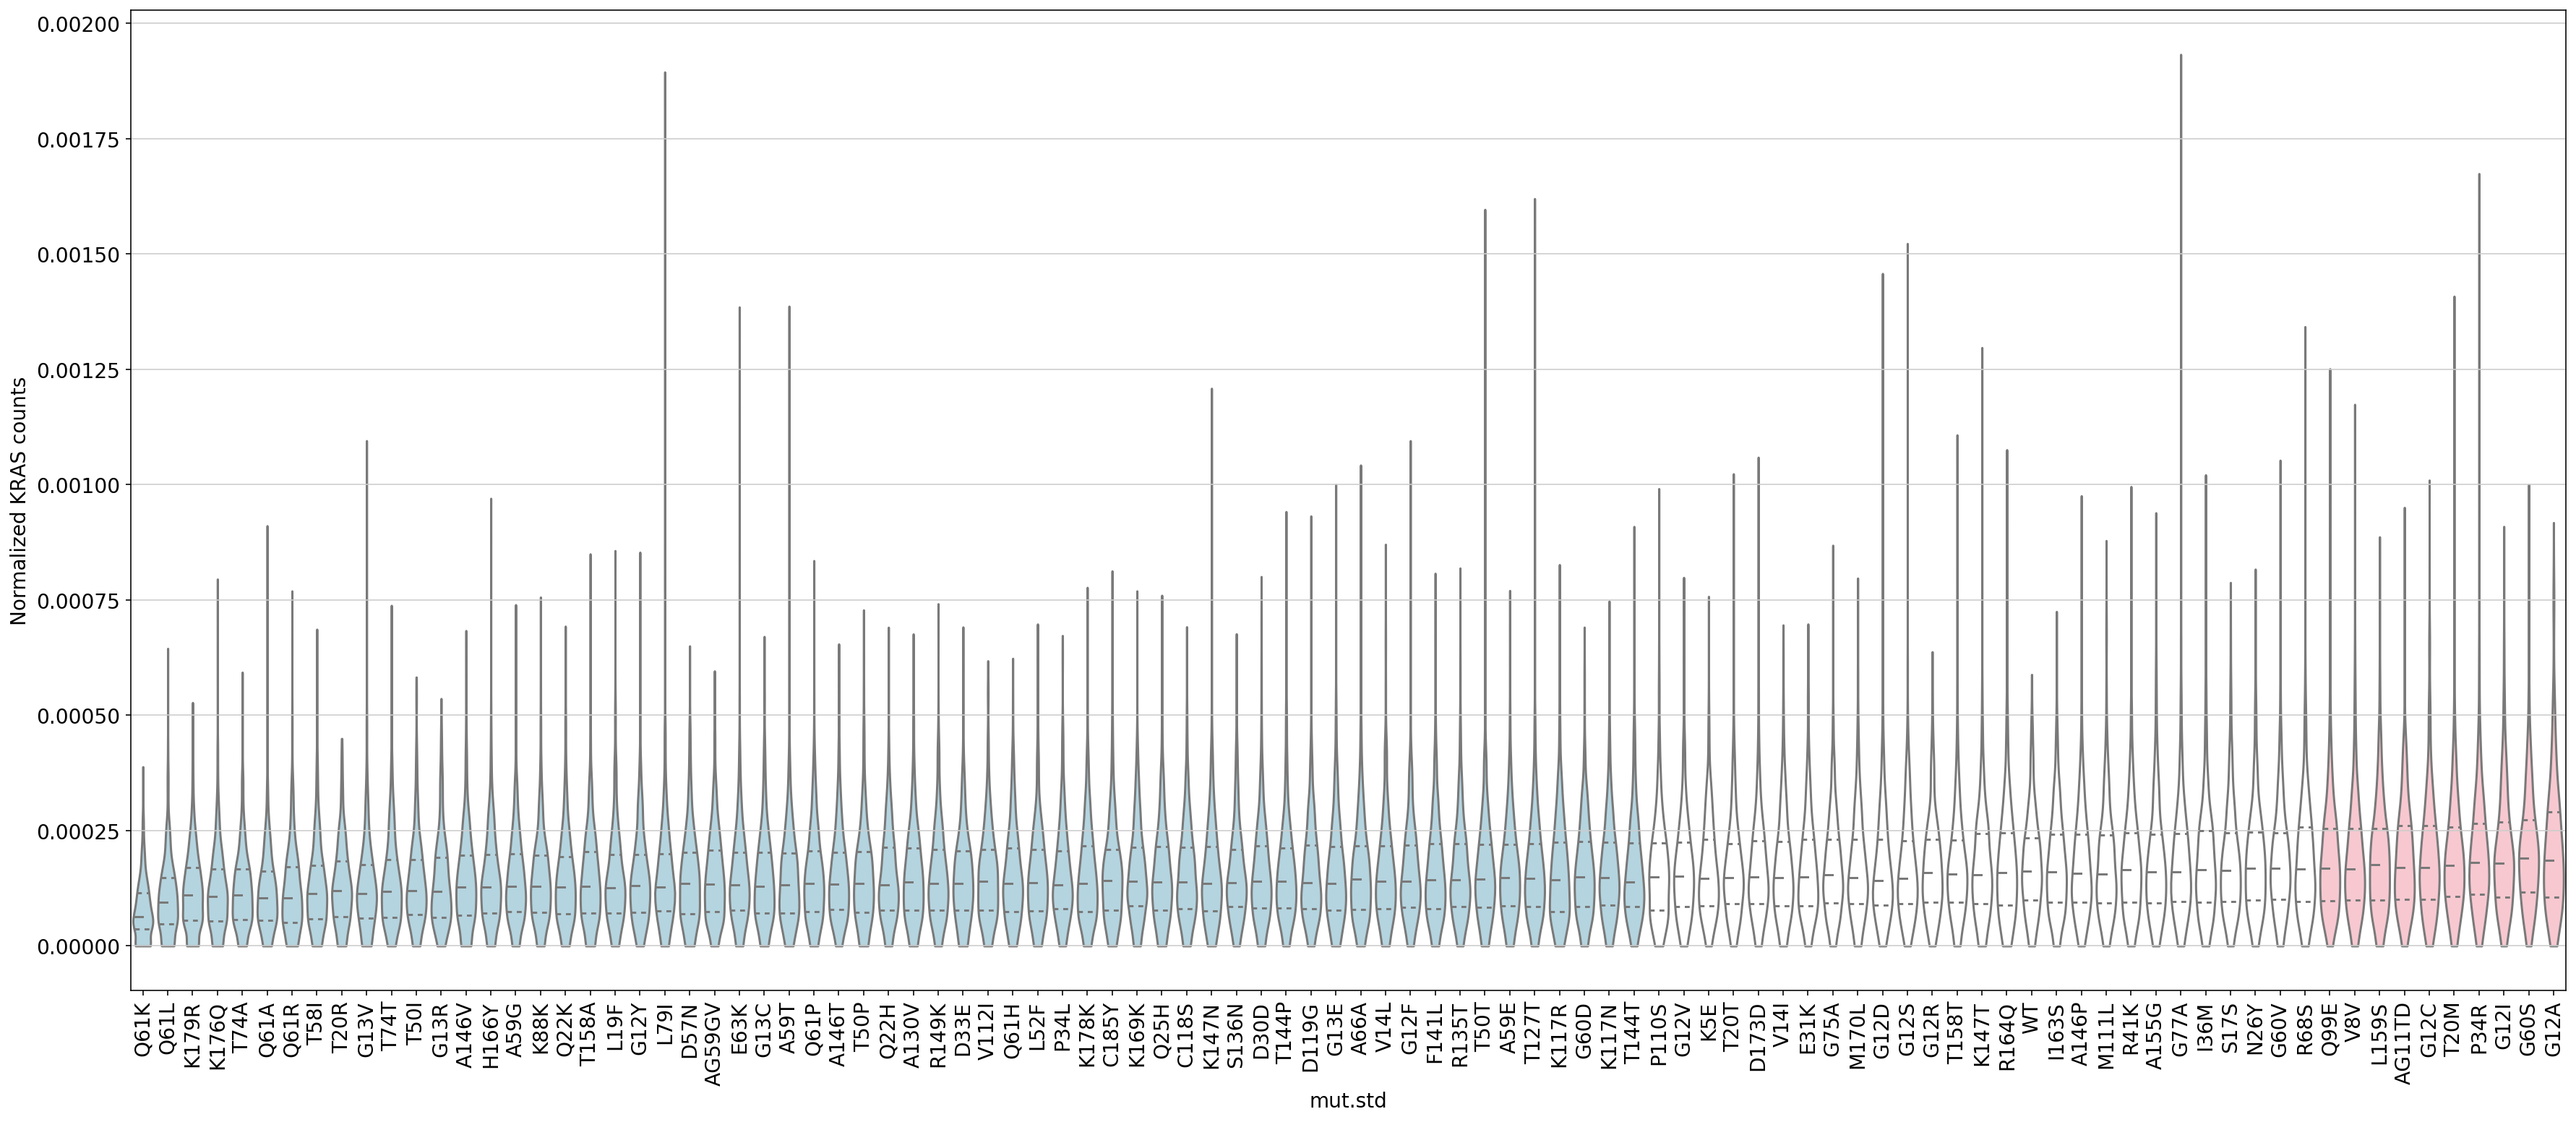

In [19]:
vbc_counts_clip=copy.deepcopy(vbc_counts)
vbc_counts_clip['Normalized '+PROTEIN+' counts'][vbc_counts_clip['Normalized '+PROTEIN+' counts']>0.003]=0.003
sorted_catplot_given_order(vbc_counts_clip,'mut.std','Normalized '+PROTEIN+' counts',
                           list(de_vbc['variant']),
                           'mut.std',
              color_dict,figwidth=30,figheight=12)

In [20]:
remember_de_protein=de_vbc

In [21]:
remember_de_protein.index=remember_de_protein['variant']
remember_de_vbc.index=remember_de_vbc['variant']

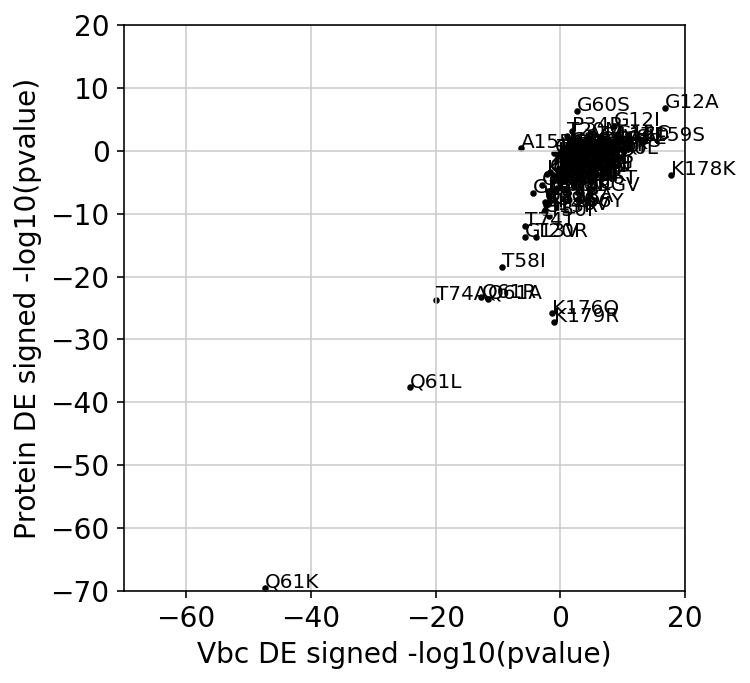

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.scatter(remember_de_vbc['signed_minuslogp.bh'],
           remember_de_protein.loc[remember_de_vbc.index,'signed_minuslogp.bh'],
           color='black',s=5)
ax.set_xlabel('Vbc DE signed -log10(pvalue)')
ax.set_ylabel('Protein DE signed -log10(pvalue)')
ax.set_xlim(-70,20)
ax.set_ylim(-70,20)
for i, txt in enumerate(remember_de_vbc['variant']):
    ax.annotate(txt, (remember_de_vbc['signed_minuslogp.bh'][i], 
                      remember_de_protein.loc[remember_de_vbc.index,'signed_minuslogp.bh'][i]),
               fontsize=10)

Processing
==

In [14]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.h5ad')
adata

Only considering the two last: ['.counts_per_cell20000', '.h5ad'].
Only considering the two last: ['.counts_per_cell20000', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 24482 
    obs: 'KRAS_A146P', 'KRAS_A146T', 'KRAS_A146V', 'KRAS_A59E', 'KRAS_A59G', 'KRAS_A59T', 'KRAS_AG11TD', 'KRAS_AG59GV', 'KRAS_C118S', 'KRAS_D119G', 'KRAS_D33E', 'KRAS_D57N', 'KRAS_E31K', 'KRAS_E63K-', 'KRAS_G12A', 'KRAS_G12C', 'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12I', 'KRAS_G12R', 'KRAS_G12S', 'KRAS_G12V', 'KRAS_G12Y', 'KRAS_G13C', 'KRAS_G13E', 'KRAS_G13R', 'KRAS_G13V', 'KRAS_G60D', 'KRAS_G60S', 'KRAS_G60V', 'KRAS_H166Y', 'KRAS_I163S', 'KRAS_I36M', 'KRAS_K117N', 'KRAS_K117R', 'KRAS_K147N', 'KRAS_K147T', 'KRAS_K176Q', 'KRAS_K5E', 'KRAS_L159S', 'KRAS_L19F', 'KRAS_L52F', 'KRAS_L79I', 'KRAS_M111L', 'KRAS_N26Y', 'KRAS_P110S', 'KRAS_P34L', 'KRAS_P34R', 'KRAS_Q22H', 'KRAS_Q22K', 'KRAS_Q25H', 'KRAS_Q61A', 'KRAS_Q61H', 'KRAS_Q61K', 'KRAS_Q61L', 'KRAS_Q61P', 'KRAS_Q61R', 'KRAS_Q99E', 'KRAS_R135T', 'KRAS_R149K', 'KRAS_R164Q', 'KRAS_R41K', 'KRAS_R68S', 'KRAS_T144P', 'KRAS_T158A', 'KRAS_T20M', 'KRAS_T20R', 'KRAS_T50I', 'KRAS_T50P', 'KRAS_T58I', 'KRA

In [15]:
#normalize
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata.raw = sc.pp.log1p(adata, copy=True)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:16): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [16]:
MIN_DISPERSION=0.5
sc.pp.highly_variable_genes(adata,
                            min_mean=0.0125, max_mean=4, 
                            min_disp=MIN_DISPERSION,flavor='seurat')

extracting highly variable genes
    finished (0:00:33)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [17]:
print(np.sum(1.0*np.array(adata.var['highly_variable'])))

1145.0


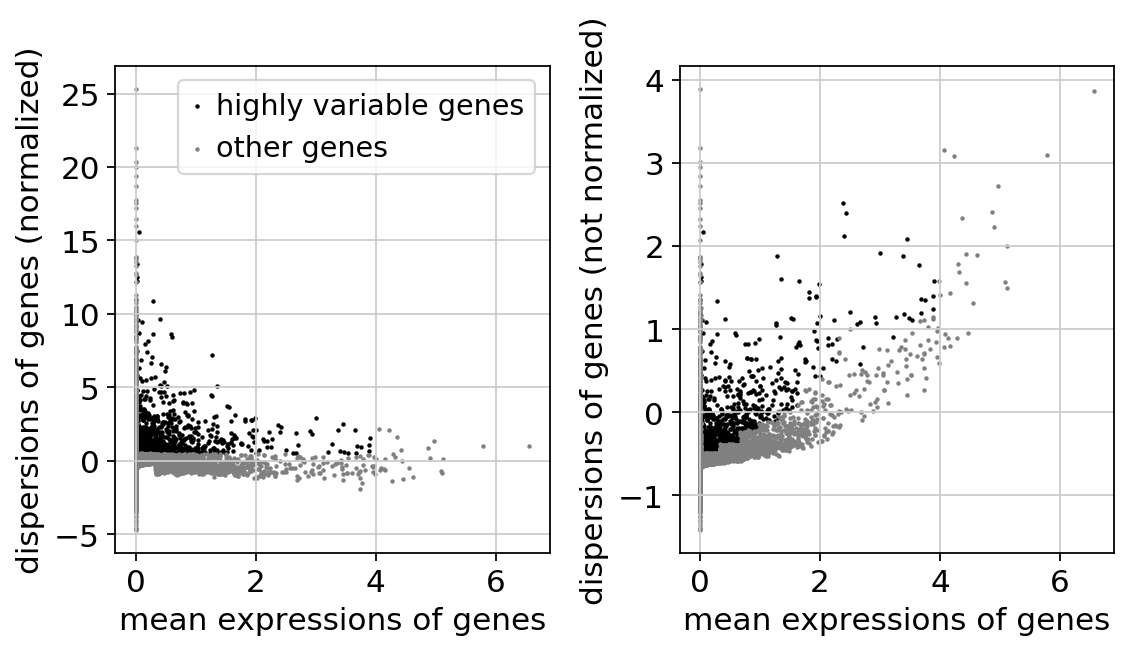

In [18]:
sc.pl.highly_variable_genes(adata)

In [19]:
adata = adata[:, adata.var['highly_variable']]
adata

View of AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'KRAS_A146P', 'KRAS_A146T', 'KRAS_A146V', 'KRAS_A59E', 'KRAS_A59G', 'KRAS_A59T', 'KRAS_AG11TD', 'KRAS_AG59GV', 'KRAS_C118S', 'KRAS_D119G', 'KRAS_D33E', 'KRAS_D57N', 'KRAS_E31K', 'KRAS_E63K-', 'KRAS_G12A', 'KRAS_G12C', 'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12I', 'KRAS_G12R', 'KRAS_G12S', 'KRAS_G12V', 'KRAS_G12Y', 'KRAS_G13C', 'KRAS_G13E', 'KRAS_G13R', 'KRAS_G13V', 'KRAS_G60D', 'KRAS_G60S', 'KRAS_G60V', 'KRAS_H166Y', 'KRAS_I163S', 'KRAS_I36M', 'KRAS_K117N', 'KRAS_K117R', 'KRAS_K147N', 'KRAS_K147T', 'KRAS_K176Q', 'KRAS_K5E', 'KRAS_L159S', 'KRAS_L19F', 'KRAS_L52F', 'KRAS_L79I', 'KRAS_M111L', 'KRAS_N26Y', 'KRAS_P110S', 'KRAS_P34L', 'KRAS_P34R', 'KRAS_Q22H', 'KRAS_Q22K', 'KRAS_Q25H', 'KRAS_Q61A', 'KRAS_Q61H', 'KRAS_Q61K', 'KRAS_Q61L', 'KRAS_Q61P', 'KRAS_Q61R', 'KRAS_Q99E', 'KRAS_R135T', 'KRAS_R149K', 'KRAS_R164Q', 'KRAS_R41K', 'KRAS_R68S', 'KRAS_T144P', 'KRAS_T158A', 'KRAS_T20M', 'KRAS_T20R', 'KRAS_T50I', 'KRAS_T50P', 'KRAS_T58I

In [20]:
#batch correct
to_regress_out=[]
for batch in set(adata.obs['batch']):
    batch_vector=np.zeros((1,len(adata.obs_names)))
    for cell_idx in range(len(adata.obs_names)):
        if adata.obs['batch'][cell_idx]==batch:
            batch_vector[0,cell_idx]=1.0
    batchname='batch_num'+batch
    adata.obs[batchname]=batch_vector[0,:]
    to_regress_out.append(batchname)

#add total counts and percent mito to the stuff to regress out
to_regress_out.append('n_counts')
to_regress_out.append('percent_mito')
sc.pp.regress_out(adata,to_regress_out)


Trying to set attribute `.obs` of view, copying.


regressing out ['batch_num31', 'batch_num29', 'batch_num2', 'batch_num25', 'batch_num0', 'batch_num18', 'batch_num28', 'batch_num30', 'batch_num8', 'batch_num9', 'batch_num3', 'batch_num27', 'batch_num7', 'batch_num11', 'batch_num6', 'batch_num24', 'batch_num15', 'batch_num14', 'batch_num20', 'batch_num23', 'batch_num1', 'batch_num12', 'batch_num22', 'batch_num13', 'batch_num4', 'batch_num10', 'batch_num19', 'batch_num21', 'batch_num5', 'batch_num16', 'batch_num26', 'batch_num17', 'n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (1:10:55)


In [22]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.batch_regressed.h5ad')

In [23]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.batch_regressed.h5ad')
adata

Only considering the two last: ['.batch_regressed', '.h5ad'].
Only considering the two last: ['.batch_regressed', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'KRAS_A146P', 'KRAS_A146T', 'KRAS_A146V', 'KRAS_A59E', 'KRAS_A59G', 'KRAS_A59T', 'KRAS_AG11TD', 'KRAS_AG59GV', 'KRAS_C118S', 'KRAS_D119G', 'KRAS_D33E', 'KRAS_D57N', 'KRAS_E31K', 'KRAS_E63K-', 'KRAS_G12A', 'KRAS_G12C', 'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12I', 'KRAS_G12R', 'KRAS_G12S', 'KRAS_G12V', 'KRAS_G12Y', 'KRAS_G13C', 'KRAS_G13E', 'KRAS_G13R', 'KRAS_G13V', 'KRAS_G60D', 'KRAS_G60S', 'KRAS_G60V', 'KRAS_H166Y', 'KRAS_I163S', 'KRAS_I36M', 'KRAS_K117N', 'KRAS_K117R', 'KRAS_K147N', 'KRAS_K147T', 'KRAS_K176Q', 'KRAS_K5E', 'KRAS_L159S', 'KRAS_L19F', 'KRAS_L52F', 'KRAS_L79I', 'KRAS_M111L', 'KRAS_N26Y', 'KRAS_P110S', 'KRAS_P34L', 'KRAS_P34R', 'KRAS_Q22H', 'KRAS_Q22K', 'KRAS_Q25H', 'KRAS_Q61A', 'KRAS_Q61H', 'KRAS_Q61K', 'KRAS_Q61L', 'KRAS_Q61P', 'KRAS_Q61R', 'KRAS_Q99E', 'KRAS_R135T', 'KRAS_R149K', 'KRAS_R164Q', 'KRAS_R41K', 'KRAS_R68S', 'KRAS_T144P', 'KRAS_T158A', 'KRAS_T20M', 'KRAS_T20R', 'KRAS_T50I', 'KRAS_T50P', 'KRAS_T58I', 'KRAS

computing PCA with n_comps = 50
    on highly variable genes
    finished (0:01:35)


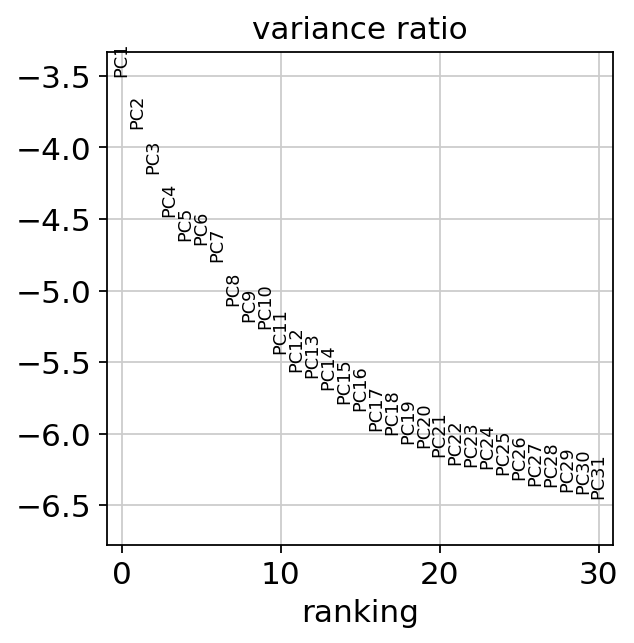

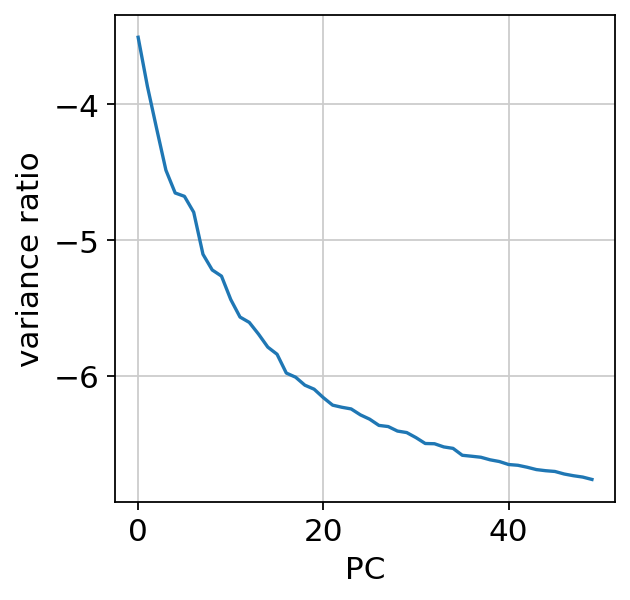

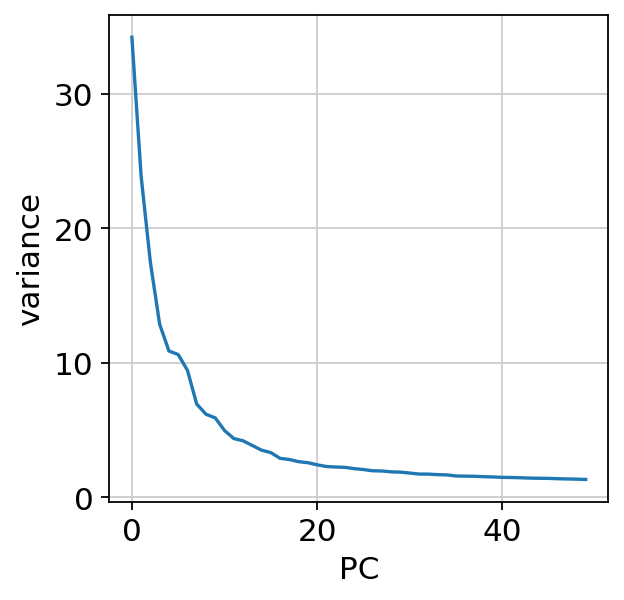

In [24]:
#zscores
sc.pp.scale(adata, max_value=10)

#PCs
sc.tl.pca(adata,svd_solver='arpack',n_comps=50)
adata.obsm['X_pca'] *= -1
sc.pl.pca_variance_ratio(adata, log=True)

plt.plot(np.log(adata.uns['pca']['variance_ratio']))
plt.xlabel('PC')
plt.ylabel('variance ratio')
plt.show()
plt.plot(adata.uns['pca']['variance'])
plt.xlabel('PC')
plt.ylabel('variance')
plt.show()

In [25]:
sc.pp.neighbors(adata, n_neighbors=10) #15 neighbors is default
sc.tl.louvain(adata)


computing neighbors
    using 'X_pca' with n_pcs = 50


/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../users/oursu/software/anaconda3/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:03:18)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:02:22)


In [26]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:08:58)


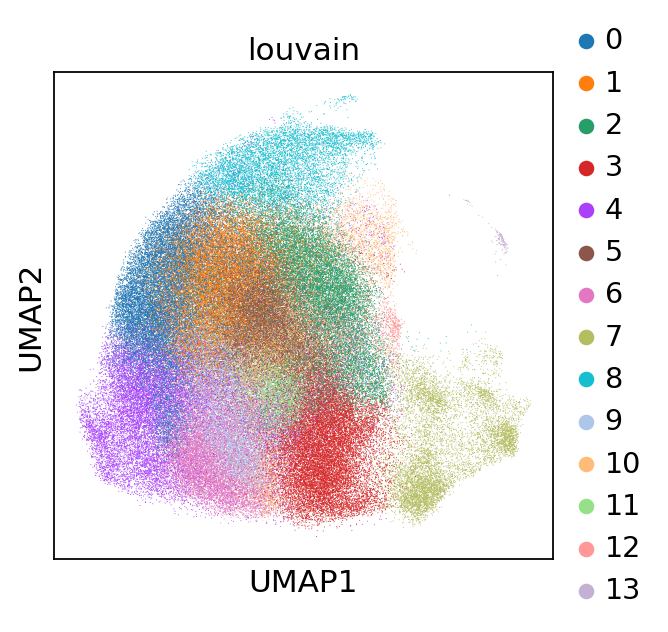

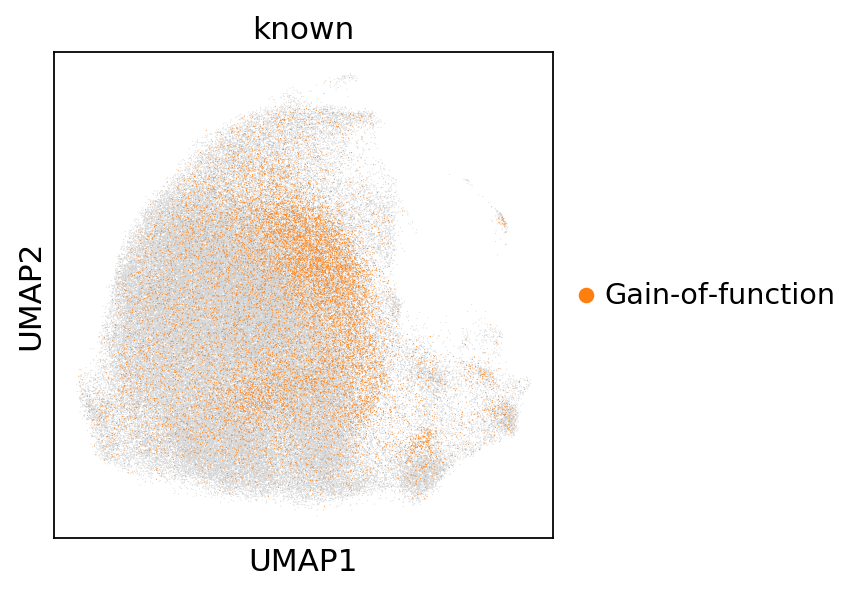

In [27]:
sc.pl.umap(adata,color=['louvain'])
sc.pl.umap(adata,color=['known'],groups=['Gain-of-function'])


In [28]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.analysis.h5ad')

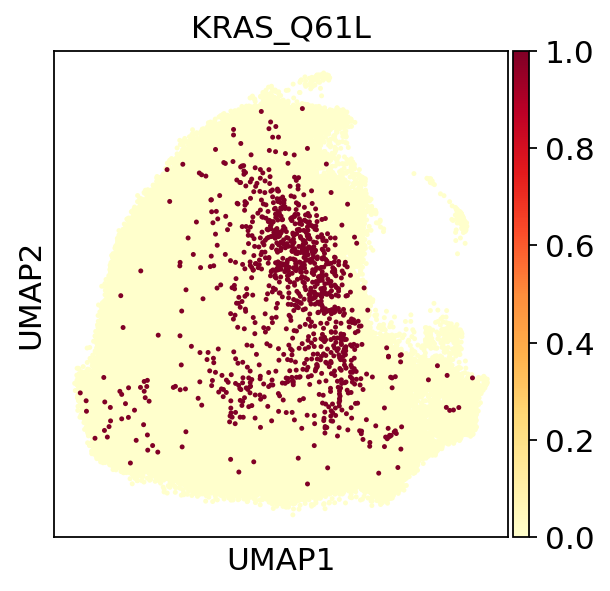

In [31]:
sc.pl.umap(adata,color='KRAS_Q61L',cmap='YlOrRd',s=20,vmax=1)

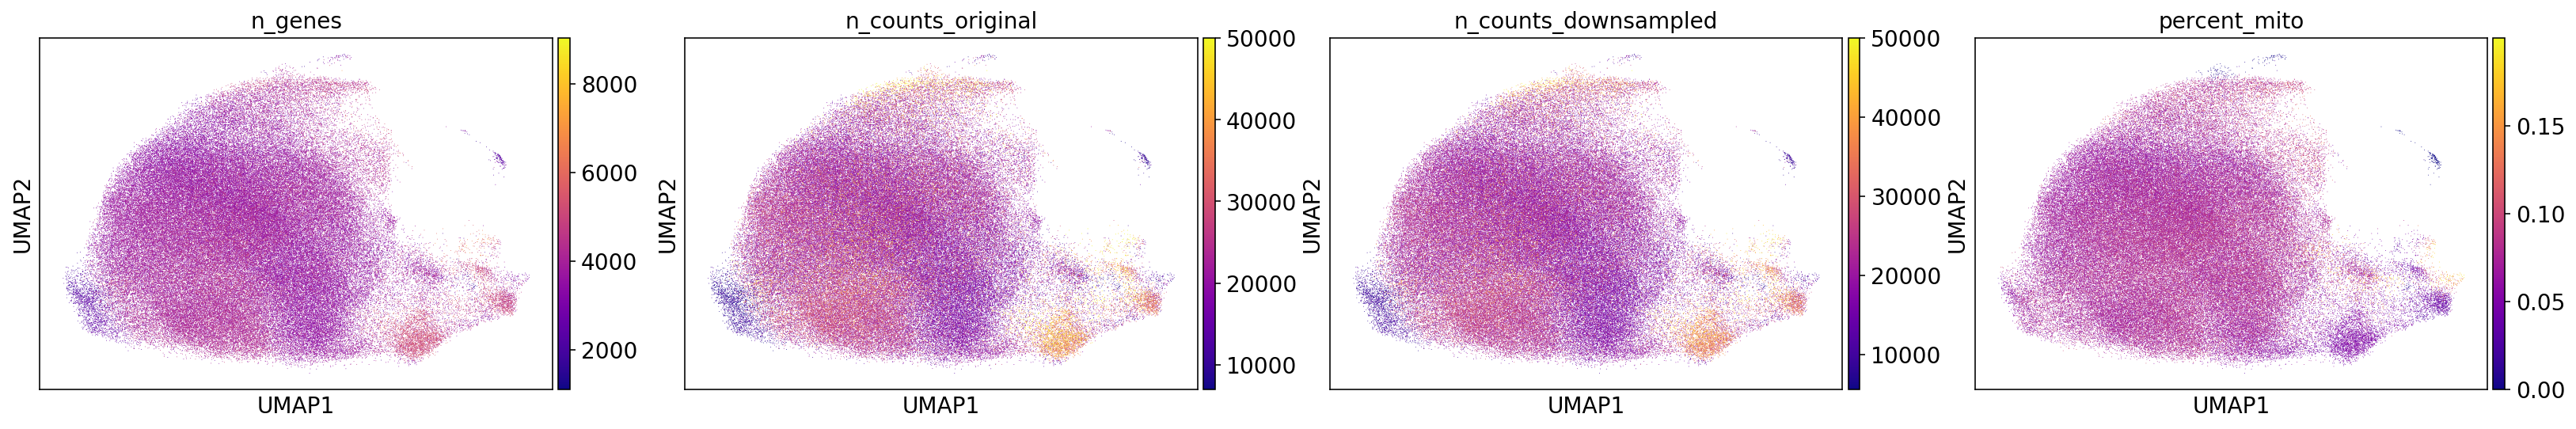

In [37]:
sc.pl.umap(adata,color=['n_genes','n_counts_original','n_counts_downsampled','percent_mito'],
          cmap='plasma')

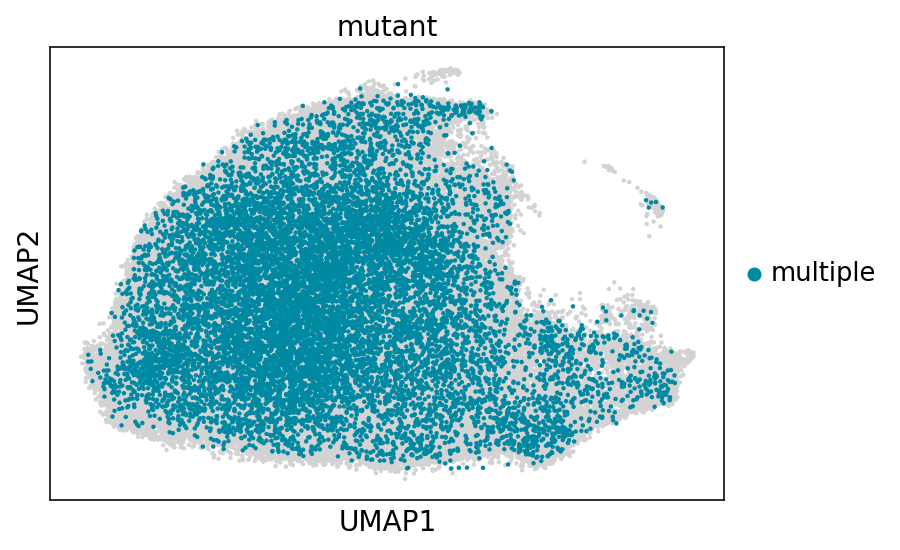

In [39]:
sc.pl.umap(adata,color=['mutant'],groups=['multiple'],s=20)

Building bulk
Computing profile correlations
90 %

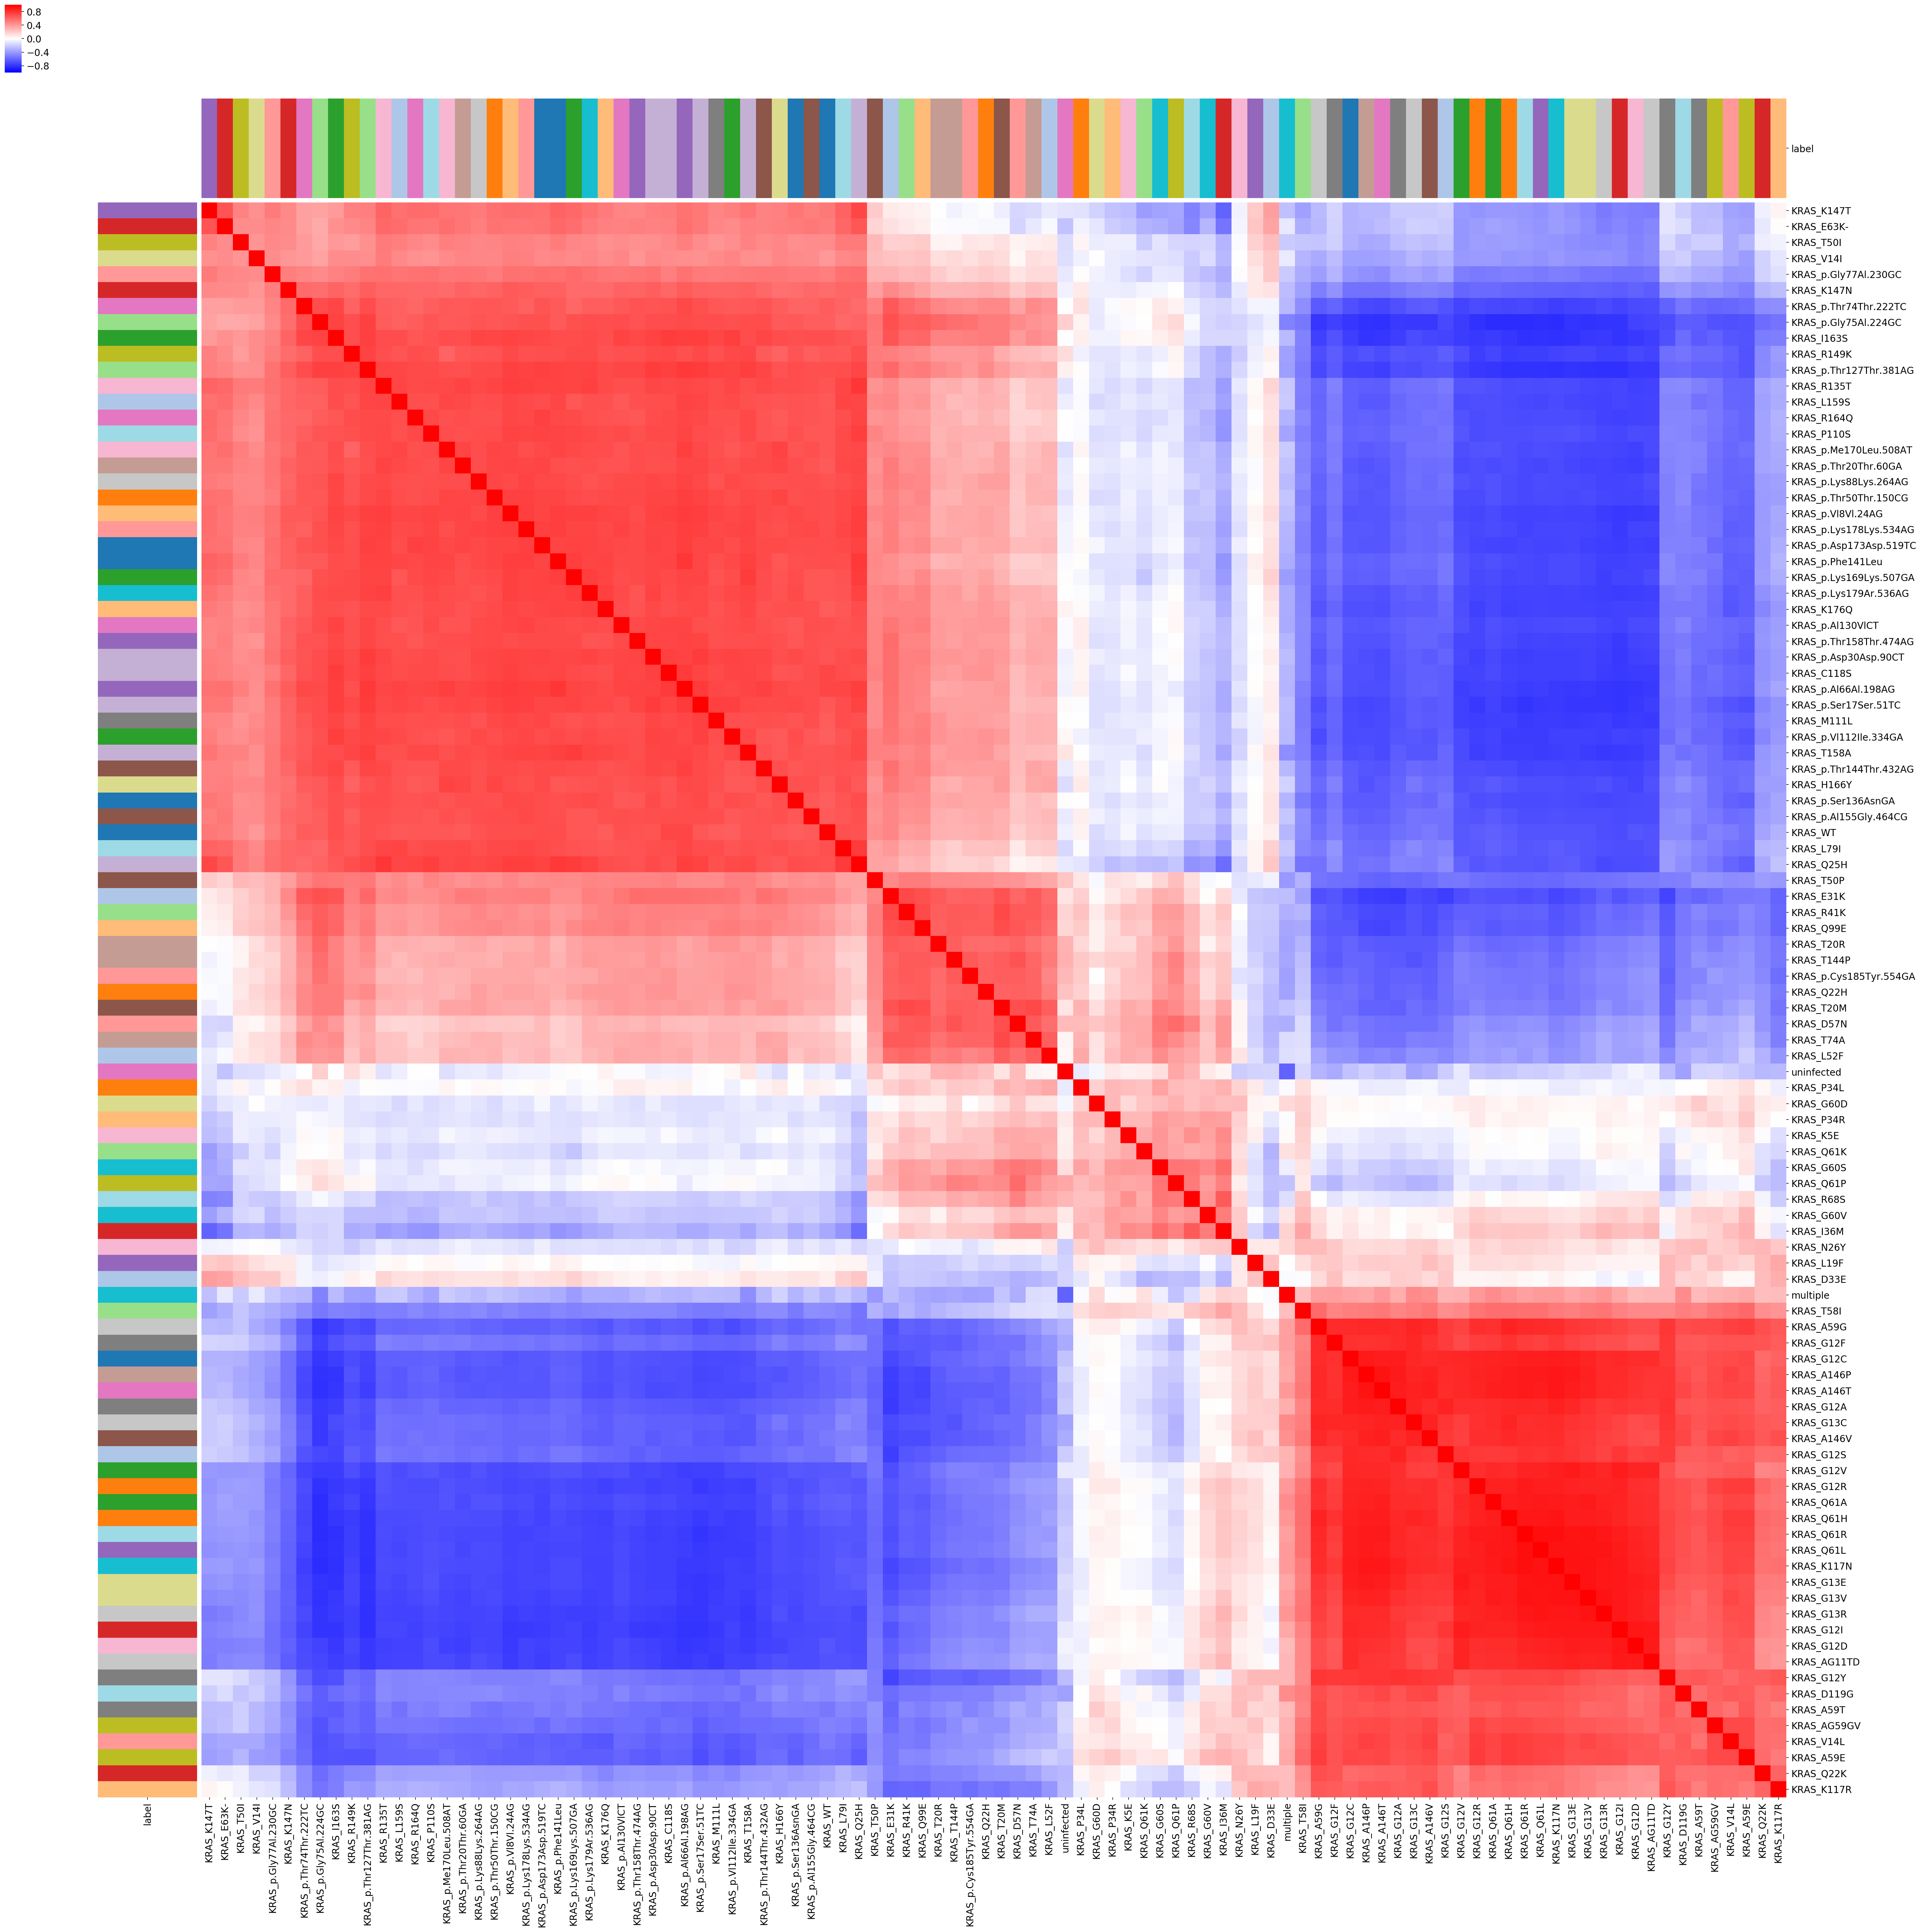

In [32]:
#quickly test the clustering using bulkification


from perturbseq.analysis import analyze_bulk_corr,build_bulk,get_corr_mat
from perturbseq.vis import cluster_matrix,plot_clustered_matrix,df_to_colors,get_figsize


%matplotlib inline
import matplotlib.pyplot as plt


corr=analyze_bulk_corr(adata,grouping_variable='mutant',label_variable='mutant',
                       by_batch=False,corr_type='spearman',fig_path='NA',vmin=-1,vmax=1,
                       figsize_multiplier=1.5)

In [5]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.analysis.h5ad')
adata

Only considering the two last: ['.analysis', '.h5ad'].
Only considering the two last: ['.analysis', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'KRAS_A146P', 'KRAS_A146T', 'KRAS_A146V', 'KRAS_A59E', 'KRAS_A59G', 'KRAS_A59T', 'KRAS_AG11TD', 'KRAS_AG59GV', 'KRAS_C118S', 'KRAS_D119G', 'KRAS_D33E', 'KRAS_D57N', 'KRAS_E31K', 'KRAS_E63K-', 'KRAS_G12A', 'KRAS_G12C', 'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12I', 'KRAS_G12R', 'KRAS_G12S', 'KRAS_G12V', 'KRAS_G12Y', 'KRAS_G13C', 'KRAS_G13E', 'KRAS_G13R', 'KRAS_G13V', 'KRAS_G60D', 'KRAS_G60S', 'KRAS_G60V', 'KRAS_H166Y', 'KRAS_I163S', 'KRAS_I36M', 'KRAS_K117N', 'KRAS_K117R', 'KRAS_K147N', 'KRAS_K147T', 'KRAS_K176Q', 'KRAS_K5E', 'KRAS_L159S', 'KRAS_L19F', 'KRAS_L52F', 'KRAS_L79I', 'KRAS_M111L', 'KRAS_N26Y', 'KRAS_P110S', 'KRAS_P34L', 'KRAS_P34R', 'KRAS_Q22H', 'KRAS_Q22K', 'KRAS_Q25H', 'KRAS_Q61A', 'KRAS_Q61H', 'KRAS_Q61K', 'KRAS_Q61L', 'KRAS_Q61P', 'KRAS_Q61R', 'KRAS_Q99E', 'KRAS_R135T', 'KRAS_R149K', 'KRAS_R164Q', 'KRAS_R41K', 'KRAS_R68S', 'KRAS_T144P', 'KRAS_T158A', 'KRAS_T20M', 'KRAS_T20R', 'KRAS_T50I', 'KRAS_T50P', 'KRAS_T58I', 'KRAS

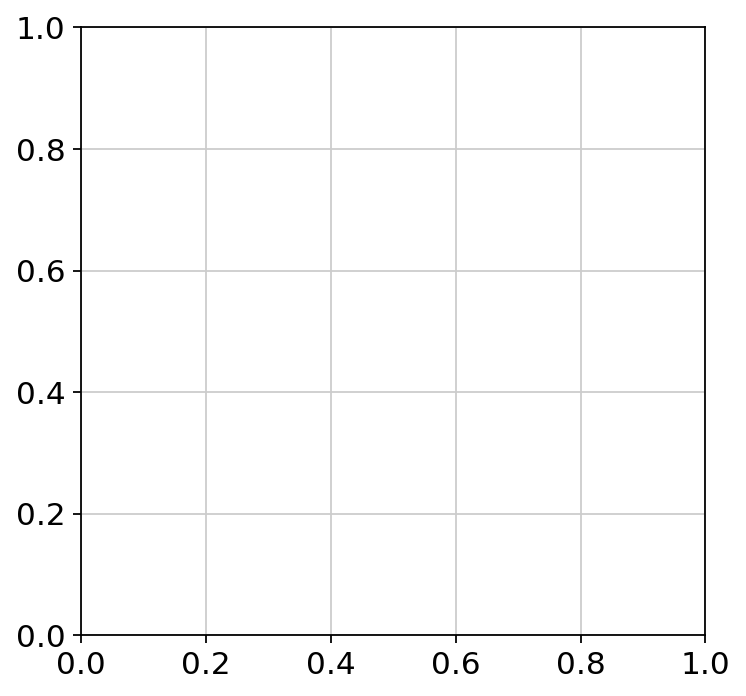

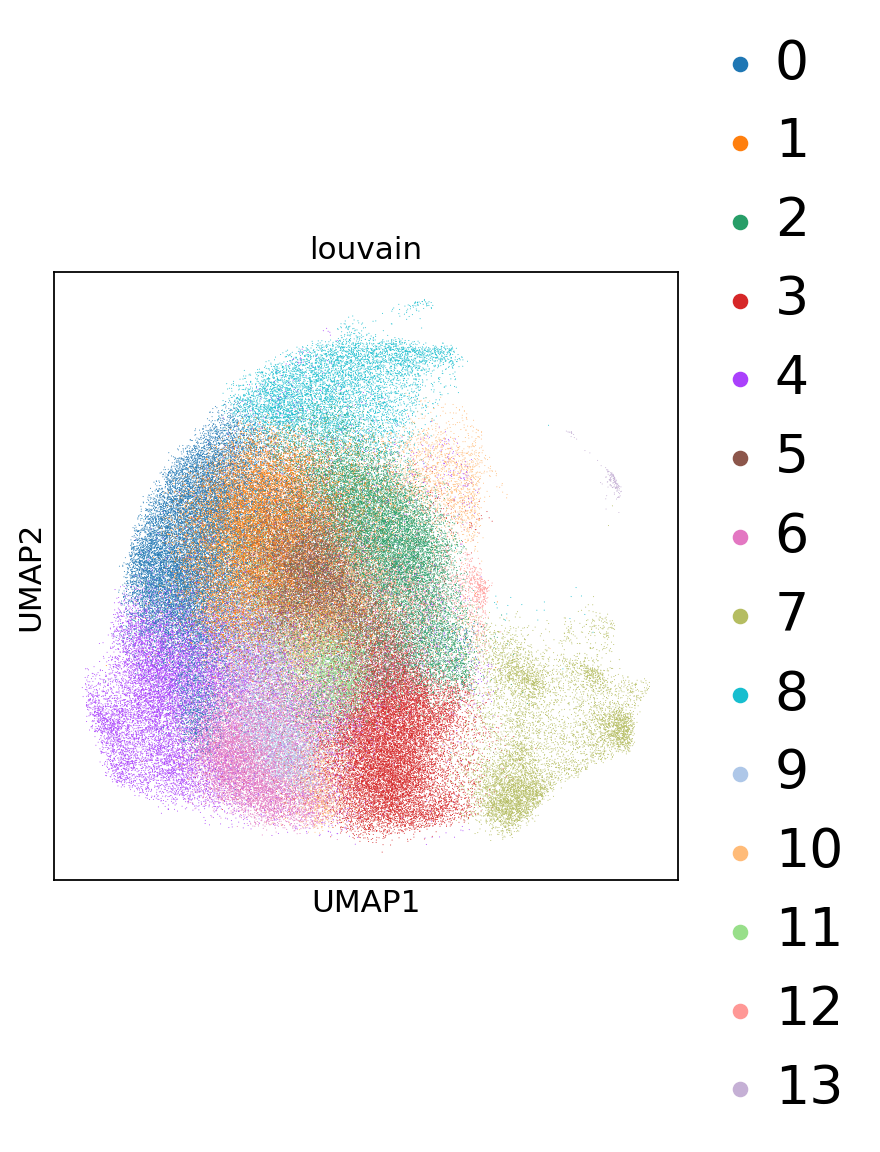

In [6]:
%matplotlib inline

fw=5
fh=5
sc.settings.set_figure_params(dpi=80, color_map='viridis',figsize=(fw,fh))
fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)

plots=sc.pl.umap(adata,color=['louvain'],return_fig=True,legend_fontsize='xx-large')
plt.savefig(FIGS+'/Supplement/KRAS.UMAP.Louvain.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/Supplement/KRAS.UMAP.Louvain.png',bbox_inches = "tight")